In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [3]:
# !wget $data

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Data preparation

In [7]:
columns = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP']

In [8]:
df = df[columns].copy()

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [11]:
strings

['make', 'model', 'transmission_type', 'vehicle_style']

In [12]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [14]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

msrp
[46135 40650 36350 29450 34500]
6049



<Axes: xlabel='msrp', ylabel='Count'>

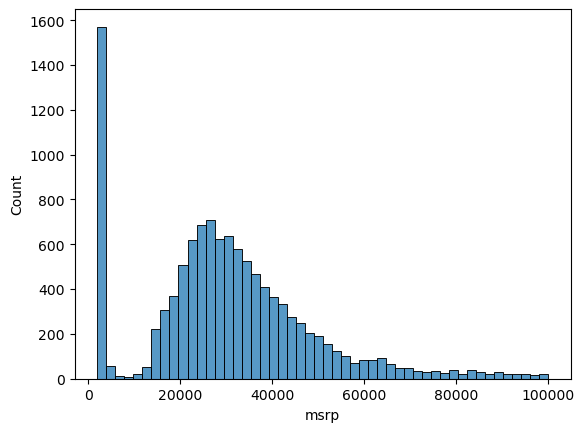

In [16]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [17]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [18]:
df = df.fillna(0)

In [19]:
df["above_average"] = np.where(df["msrp"] > df["msrp"].mean(), 1, 0)

In [20]:
# df["above_average_2"] = df["msrp"] > df["msrp"].mean()
# del df["above_average_2"]

In [21]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


### Setting up the validation framework

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
len(df_full_train), len(df_test)

(9531, 2383)

In [25]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

In [29]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [30]:
df_test

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,lotus,evora_400,2017,400.0,6.0,manual,coupe,39,21
1,aston_martin,v8_vantage,2014,420.0,8.0,automated_manual,convertible,21,14
2,hyundai,genesis,2015,311.0,6.0,automatic,sedan,29,18
3,suzuki,samurai,1993,66.0,4.0,manual,convertible_suv,26,24
4,mitsubishi,outlander,2015,166.0,4.0,automatic,4dr_suv,29,24
...,...,...,...,...,...,...,...,...,...
2378,mitsubishi,endeavor,2008,225.0,6.0,automatic,4dr_suv,19,15
2379,bentley,continental_flying_spur,2013,552.0,12.0,automatic,sedan,19,11
2380,kia,optima,2014,274.0,4.0,automatic,sedan,31,20
2381,lamborghini,aventador,2014,700.0,12.0,automated_manual,convertible,16,10


In [31]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

### ROC Curves

In [32]:
# above average rate is 27%
df_full_train.above_average.value_counts(normalize=True)

0    0.726472
1    0.273528
Name: above_average, dtype: float64

In [33]:
global_above_avg_rate = df_full_train.above_average.mean()
global_above_avg_rate

0.2735284859930752

In [34]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [35]:
categorical = ['make', 'model', 
       'transmission_type', 'vehicle_style']

In [36]:
df_full_train[categorical].nunique()

make                  48
model                899
transmission_type      5
vehicle_style         16
dtype: int64

In [37]:
df_full_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
2711,mercedes-benz,clk-class,2007,382.0,8.0,automatic,coupe,22,15,54900,1
333,nissan,370z,2016,332.0,6.0,manual,coupe,26,18,29990,0
9377,gmc,sierra_1500,2017,285.0,6.0,automatic,extended_cab_pickup,24,18,32230,0
939,porsche,911,2016,350.0,6.0,manual,convertible,26,19,102930,1
5675,volkswagen,gti,2013,200.0,4.0,manual,4dr_hatchback,31,21,28795,0


In [38]:
df_full_train[df_full_train.make == 'nissan'].above_average.mean()

0.14888888888888888

In [39]:
df_full_train[df_full_train.year == 2007].above_average.mean()

0.08823529411764706

In [40]:
global_above_avg_rate

0.2735284859930752

In [41]:
df_full_train[df_full_train.model == '370z'].above_average.mean()

0.5121951219512195

In [42]:
df_full_train[df_full_train.engine_cylinders == 8.0].above_average.mean()

0.5971796443899449

In [43]:
df_full_train.groupby('engine_cylinders').above_average.mean()

engine_cylinders
0.0     0.323944
3.0     0.000000
4.0     0.085797
5.0     0.086207
6.0     0.286548
8.0     0.597180
10.0    1.000000
12.0    0.962963
16.0    1.000000
Name: above_average, dtype: float64

In [44]:
from IPython.display import display

In [45]:
for c in categorical:
    df_group = df_full_train.groupby(c).above_average.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_above_avg_rate
    df_group['risk'] = df_group['mean'] / global_above_avg_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
make,,,,
acura,0.374359,195,0.100830,1.368629
alfa_romeo,1.000000,3,0.726472,3.655926
aston_martin,1.000000,81,0.726472,3.655926
audi,0.645756,271,0.372228,2.360838
bentley,1.000000,60,0.726472,3.655926
bmw,0.808824,272,0.535295,2.956999
bugatti,1.000000,2,0.726472,3.655926
buick,0.097561,164,-0.175968,0.356676
cadillac,0.871069,318,0.597541,3.184565


,mean,count,diff,risk
model,,,,
100,0.000000,13,-0.273528,0.000000
124_spider,0.000000,3,-0.273528,0.000000
190-class,0.000000,4,-0.273528,0.000000
1_series,0.357143,14,0.083614,1.305688
1_series_m,1.000000,1,0.726472,3.655926
...,...,...,...,...
z4,1.000000,6,0.726472,3.655926
z4_m,1.000000,3,0.726472,3.655926
z8,1.000000,3,0.726472,3.655926


,mean,count,diff,risk
transmission_type,,,,
automated_manual,0.480159,504,0.206630,1.755425
automatic,0.303840,6589,0.030311,1.110816
direct_drive,0.403509,57,0.129980,1.475198
manual,0.143824,2364,-0.129704,0.525810
unknown,0.000000,17,-0.273528,0.000000


,mean,count,diff,risk
vehicle_style,,,,
2dr_hatchback,0.000000,394,-0.273528,0.000000
2dr_suv,0.044248,113,-0.229281,0.161767
4dr_hatchback,0.041522,578,-0.232006,0.151803
4dr_suv,0.374494,1976,0.100965,1.369122
cargo_minivan,0.000000,59,-0.273528,0.000000
cargo_van,0.000000,74,-0.273528,0.000000
convertible,0.549231,650,0.275702,2.007947
convertible_suv,0.160000,25,-0.113528,0.584948
coupe,0.474872,975,0.201343,1.736096


### Feature importance : Mutual information

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full_train.above_average, df_full_train.engine_cylinders)

0.11570992047729531

In [48]:
def mutual_info_aboveavg_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [49]:
mi = df_full_train[categorical].apply(mutual_info_aboveavg_score)
mi.sort_values(ascending=False)

model                0.461397
make                 0.238883
vehicle_style        0.082659
transmission_type    0.019411
dtype: float64

### Feature importance : Correlation

In [50]:
df_full_train[numerical].corrwith(df_full_train.above_average).sort_values(ascending=False)

engine_hp           0.662140
engine_cylinders    0.451155
year                0.315696
highway_mpg        -0.132301
city_mpg           -0.150914
dtype: float64

In [51]:
df_full_train[df_full_train['city_mpg'] > 100].above_average.mean()

0.1951219512195122

In [52]:
df_full_train['city_mpg'].max()

137

In [53]:
df_full_train[df_full_train['city_mpg'] < 120].above_average.mean()

0.27416298168035375

### One-hot encoding

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [56]:
train_dicts

[{'make': 'toyota',
  'model': 'highlander_hybrid',
  'transmission_type': 'automatic',
  'vehicle_style': '4dr_suv',
  'year': 2016,
  'engine_hp': 280.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 28,
  'city_mpg': 27},
 {'make': 'chevrolet',
  'model': 'impala_limited',
  'transmission_type': 'automatic',
  'vehicle_style': 'sedan',
  'year': 2014,
  'engine_hp': 300.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 30,
  'city_mpg': 18},
 {'make': 'buick',
  'model': 'regal',
  'transmission_type': 'automatic',
  'vehicle_style': 'sedan',
  'year': 2016,
  'engine_hp': 259.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 27,
  'city_mpg': 19},
 {'make': 'volkswagen',
  'model': 'cc',
  'transmission_type': 'automated_manual',
  'vehicle_style': 'sedan',
  'year': 2015,
  'engine_hp': 280.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 25,
  'city_mpg': 17},
 {'make': 'dodge',
  'model': 'grand_caravan',
  'transmission_type': 'automatic',
  'vehicle_style': 'passenger_minivan',
  'year'

In [57]:
dv = DictVectorizer(sparse=False)

In [58]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [59]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=acura', 'make=alfa_romeo', 'make=aston_martin', 'make=audi',
       'make=bentley', 'make=bmw', 'make=bugatti', 'make=buick',
       'make=cadillac', 'make=chevrolet', 'make=chrysler', 'make=dodge',
       'make=ferrari', 'make=fiat', 'make=ford', 'make=genesis',
       'make=gmc', 'make=honda', 'make=hummer', 'make=hyundai',
       'make=infiniti', 'make=kia', 'make=lamborghini', 'make=land_rover',
       'make=lexus', 'make=lincoln', 'make=lotus', 'make=maserati',
       'make=maybach', 'make=mazda', 'make=mclaren', 'make=mercedes-benz',
       'make=mitsubishi', 'make=nissan', 'make=oldsmobile',
       'make=plymouth', 'make=pontiac', 'make=porsche',
       'make=rolls-royce', 'make=saab', 'make=scion', 'make=spyker',
       'make=subaru', 'make=suzuki', 'make=tesla', 'make=toyota',
       'make=volkswagen', 'make=volvo', 'model=100', 'model=124_spider',
       'model=190-class', 'model=1_series', 'model

In [60]:
X_train = dv.transform(train_dicts)

In [61]:
# from sklearn.preprocessing import OrdinalEncoder
# years = df_train.year.sort_values().unique()
# years

In [62]:
# ordinal = OrdinalEncoder(categories=[years])

In [63]:
# df_train['year_ordinal'] = ordinal.fit_transform(df_train[['year']])

In [64]:
# df_train['engine_cylinders'].astype(str)

In [65]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [66]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [67]:
X_val = dv.transform(val_dicts)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
model.intercept_[0]

-0.006116700421859101

In [71]:
model.coef_[0].round(3)

array([-1.180e-01,  8.100e-02,  3.600e-02,  2.790e-01,  2.420e-01,
        4.100e-02,  4.400e-02,  1.007e+00,  8.000e-03,  7.700e-01,
        0.000e+00, -1.510e-01,  1.058e+00, -7.770e-01, -1.910e-01,
       -9.400e-01,  4.500e-02, -1.700e-02, -7.150e-01,  8.000e-03,
       -1.390e-01, -4.650e-01,  1.900e-02, -4.170e-01,  1.540e-01,
       -2.800e-01,  0.000e+00,  5.250e-01,  5.350e-01,  4.890e-01,
        2.680e-01,  7.200e-02,  0.000e+00, -2.020e-01,  0.000e+00,
        4.390e-01, -1.230e-01, -4.880e-01, -7.500e-02,  5.000e-03,
       -2.360e-01,  1.840e-01,  5.300e-02,  1.330e-01, -1.900e-02,
        6.000e-03, -3.000e-01, -1.210e-01,  1.560e-01, -6.210e-01,
       -4.050e-01,  4.160e-01, -1.000e-03, -1.000e-03, -1.000e-03,
        2.500e-02,  6.000e-03, -0.000e+00, -5.800e-02, -1.000e-03,
       -0.000e+00, -1.000e-03, -1.000e-02, -2.900e-02, -4.600e-02,
       -7.000e-03, -1.900e-02, -1.500e-02, -2.100e-02, -0.000e+00,
       -0.000e+00, -1.110e-01,  3.000e-02, -7.100e-02,  3.800e

In [72]:
model.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0])

In [73]:
model.predict_proba(X_train)

array([[0.58261922, 0.41738078],
       [0.47596812, 0.52403188],
       [0.8687204 , 0.1312796 ],
       ...,
       [0.99757109, 0.00242891],
       [0.99611981, 0.00388019],
       [0.90046318, 0.09953682]])

In [74]:
y_pred = model.predict_proba(X_val)[:, 1]

In [75]:
y_pred >= 0.5

array([ True, False,  True, ..., False,  True, False])

In [76]:
churn_decision = (y_pred >= 0.5)

In [77]:
y_val

0       1
1       0
2       0
3       0
4       0
       ..
2378    1
2379    0
2380    0
2381    1
2382    0
Name: above_average, Length: 2383, dtype: int64

In [78]:
churn_decision.astype(int)

array([1, 0, 1, ..., 0, 1, 0])

In [79]:
df_val[churn_decision]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,nissan,370z,2015,350.0,6.0,automatic,coupe,26,19
2,acura,rdx,2015,273.0,6.0,automatic,4dr_suv,27,19
8,aston_martin,v8_vantage,2016,430.0,8.0,manual,coupe,19,13
9,ford,flex,2016,365.0,6.0,automatic,wagon,21,15
10,gmc,sierra_1500,2017,355.0,8.0,automatic,crew_cab_pickup,22,16
...,...,...,...,...,...,...,...,...,...
2370,toyota,sequoia,2015,381.0,8.0,automatic,4dr_suv,17,13
2372,gmc,sierra_1500,2017,355.0,8.0,automatic,crew_cab_pickup,20,15
2374,bmw,5_series,2016,443.0,8.0,automatic,sedan,25,17
2378,chevrolet,camaro,2017,455.0,8.0,manual,convertible,25,16


In [80]:
(y_val == churn_decision).mean()

0.8963491397398238

In [81]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('city_mpg', -0.118),
 ('engine_cylinders', 0.081),
 ('engine_hp', 0.036),
 ('highway_mpg', 0.279),
 ('make=acura', 0.242),
 ('make=alfa_romeo', 0.041),
 ('make=aston_martin', 0.044),
 ('make=audi', 1.007),
 ('make=bentley', 0.008),
 ('make=bmw', 0.77),
 ('make=bugatti', 0.0),
 ('make=buick', -0.151),
 ('make=cadillac', 1.058),
 ('make=chevrolet', -0.777),
 ('make=chrysler', -0.191),
 ('make=dodge', -0.94),
 ('make=ferrari', 0.045),
 ('make=fiat', -0.017),
 ('make=ford', -0.715),
 ('make=genesis', 0.008),
 ('make=gmc', -0.139),
 ('make=honda', -0.465),
 ('make=hummer', 0.019),
 ('make=hyundai', -0.417),
 ('make=infiniti', 0.154),
 ('make=kia', -0.28),
 ('make=lamborghini', 0.0),
 ('make=land_rover', 0.525),
 ('make=lexus', 0.535),
 ('make=lincoln', 0.489),
 ('make=lotus', 0.268),
 ('make=maserati', 0.072),
 ('make=maybach', 0.0),
 ('make=mazda', -0.202),
 ('make=mclaren', 0.0),
 ('make=mercedes-benz', 0.439),
 ('make=mitsubishi', -0.123),
 ('make=nissan', -0.488),
 ('make=oldsmobile',

In [82]:
small = ['make', 'model', 'year']

In [83]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'make': 'toyota', 'model': 'highlander_hybrid', 'year': 2016},
 {'make': 'chevrolet', 'model': 'impala_limited', 'year': 2014},
 {'make': 'buick', 'model': 'regal', 'year': 2016},
 {'make': 'volkswagen', 'model': 'cc', 'year': 2015},
 {'make': 'dodge', 'model': 'grand_caravan', 'year': 2016},
 {'make': 'nissan', 'model': 'pathfinder', 'year': 2015},
 {'make': 'volkswagen', 'model': 'golf_gti', 'year': 2017},
 {'make': 'nissan', 'model': 'pathfinder', 'year': 2015},
 {'make': 'ford', 'model': 'windstar', 'year': 2003},
 {'make': 'mazda', 'model': 'cx-7', 'year': 2012}]

In [84]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [85]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [86]:
dv_small.get_feature_names_out()

array(['make=acura', 'make=alfa_romeo', 'make=aston_martin', 'make=audi',
       'make=bentley', 'make=bmw', 'make=bugatti', 'make=buick',
       'make=cadillac', 'make=chevrolet', 'make=chrysler', 'make=dodge',
       'make=ferrari', 'make=fiat', 'make=ford', 'make=genesis',
       'make=gmc', 'make=honda', 'make=hummer', 'make=hyundai',
       'make=infiniti', 'make=kia', 'make=lamborghini', 'make=land_rover',
       'make=lexus', 'make=lincoln', 'make=lotus', 'make=maserati',
       'make=maybach', 'make=mazda', 'make=mclaren', 'make=mercedes-benz',
       'make=mitsubishi', 'make=nissan', 'make=oldsmobile',
       'make=plymouth', 'make=pontiac', 'make=porsche',
       'make=rolls-royce', 'make=saab', 'make=scion', 'make=spyker',
       'make=subaru', 'make=suzuki', 'make=tesla', 'make=toyota',
       'make=volkswagen', 'make=volvo', 'model=100', 'model=124_spider',
       'model=190-class', 'model=1_series', 'model=1_series_m', 'model=2',
       'model=200', 'model=200sx', 'model=

In [87]:
X_train_small = dv_small.transform(dicts_train_small)

In [88]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
model_small.intercept_[0]

-0.7732159056289349

In [90]:
model_small.coef_[0]

array([ 3.27662840e-01,  5.45715444e-01,  4.45061122e+00,  1.92479664e+00,
        3.92045960e+00,  2.35768518e+00,  3.77144856e-01, -1.49843384e+00,
        2.21942831e+00, -1.53045214e+00, -1.49780641e+00, -1.40939927e+00,
        3.98908650e+00, -1.50134233e+00, -1.55089432e+00,  3.77494925e-01,
       -9.01789673e-01, -2.69986169e+00, -5.75187841e-02, -2.96863989e+00,
        1.33759936e+00, -2.38422927e+00,  3.08082899e+00,  1.92859214e+00,
        1.05938592e+00,  1.34116246e+00,  2.44385502e+00,  3.61371253e+00,
        1.77583501e+00, -4.00582701e+00,  5.59238440e-01,  1.94090511e+00,
       -3.55856440e+00, -1.24147194e+00, -3.19996761e+00, -2.03967569e+00,
       -3.35886082e+00,  2.91739137e+00,  2.39051253e+00, -1.18804609e-01,
       -1.63754700e+00,  3.77183772e-01, -3.75822042e+00, -4.19553917e+00,
        1.39108491e+00, -1.47069084e+00, -1.09423921e+00,  3.29256636e-01,
       -8.14246091e-01, -5.27636204e-02, -6.70554046e-01, -7.28630690e-01,
        6.53335938e-02, -

### Using the model

In [91]:
dicts_full_train = df_full_train[numerical + categorical].to_dict(orient='records')

In [92]:
dv = DictVectorizer(sparse=False)

In [93]:
X_full_train = dv.fit_transform(dicts_full_train)

In [94]:
y_full_train = df_full_train.above_average.values

In [95]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [192]:
dicts_test

[{'make': 'lotus',
  'model': 'evora_400',
  'transmission_type': 'manual',
  'vehicle_style': 'coupe',
  'year': 2017,
  'engine_hp': 400.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 39,
  'city_mpg': 21},
 {'make': 'aston_martin',
  'model': 'v8_vantage',
  'transmission_type': 'automated_manual',
  'vehicle_style': 'convertible',
  'year': 2014,
  'engine_hp': 420.0,
  'engine_cylinders': 8.0,
  'highway_mpg': 21,
  'city_mpg': 14},
 {'make': 'hyundai',
  'model': 'genesis',
  'transmission_type': 'automatic',
  'vehicle_style': 'sedan',
  'year': 2015,
  'engine_hp': 311.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 29,
  'city_mpg': 18},
 {'make': 'suzuki',
  'model': 'samurai',
  'transmission_type': 'manual',
  'vehicle_style': 'convertible_suv',
  'year': 1993,
  'engine_hp': 66.0,
  'engine_cylinders': 4.0,
  'highway_mpg': 26,
  'city_mpg': 24},
 {'make': 'mitsubishi',
  'model': 'outlander',
  'transmission_type': 'automatic',
  'vehicle_style': '4dr_suv',
  'year': 2015,

In [97]:
X_test = dv.transform(dicts_test)

In [98]:
y_pred = model.predict_proba(X_test)[:, 1]

In [99]:
above_average_decision = (y_pred >= 0.5)

In [100]:
(above_average_decision == y_test).mean()

0.8976080570709191

In [101]:
len(y_val)

2383

In [102]:
(y_test == above_average_decision).sum()

2139

In [103]:
2139/2383

0.8976080570709191

In [104]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    above_average_decision = (y_pred >= t)
    score = (y_test == above_average_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.278
0.05 0.746
0.10 0.818
0.15 0.851
0.20 0.864
0.25 0.872
0.30 0.888
0.35 0.889
0.40 0.890
0.45 0.893
0.50 0.898
0.55 0.893
0.60 0.892
0.65 0.889
0.70 0.884
0.75 0.880
0.80 0.869
0.85 0.854
0.90 0.838
0.95 0.812
1.00 0.722


In [105]:
scores

[0.27780109106168693,
 0.7456986991187579,
 0.8182962652119178,
 0.8506084767100294,
 0.863617289131347,
 0.8724297104490139,
 0.887956357532522,
 0.8892152748636173,
 0.8896349139739824,
 0.892572387746538,
 0.8976080570709191,
 0.8934116659672682,
 0.8917331095258078,
 0.8887956357532522,
 0.8837599664288712,
 0.8799832144355854,
 0.8686529584557281,
 0.8539655895929501,
 0.8375996642887117,
 0.8115820394460763,
 0.7221989089383131]

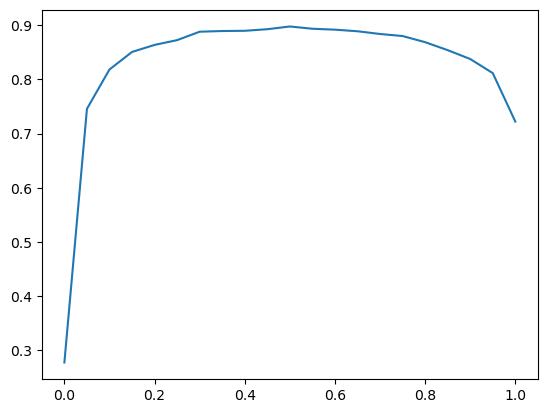

In [106]:
plt.plot(thresholds, scores)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test, y_pred >= 0.5)

0.8976080570709191

In [109]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [110]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [111]:
predict_negative

array([False, False, False, ...,  True, False,  True])

In [112]:
predict_positive & actual_positive

0        True
1        True
2       False
3       False
4       False
        ...  
2378    False
2379     True
2380    False
2381     True
2382    False
Name: above_average, Length: 2383, dtype: bool

In [113]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [114]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [115]:
tp, tn

(502, 1637)

In [116]:
fp, fn

(84, 160)

In [117]:
 confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
 ])

In [118]:
confusion_matrix

array([[1637,   84],
       [ 160,  502]])

In [119]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.69, 0.04],
       [0.07, 0.21]])

### Precision & Recall

In [120]:
# Accuracy

(tp + tn) / (tp + tn + fp + fn)

0.8976080570709191

In [121]:
# precision
# Fraction of correct positive predictions 0/1 - 1 is positive

p = tp / (tp + fp)
p

0.856655290102389

In [122]:
# Recall
# Fraction of correct positive examples (or fraction of examples we predicted correctly)

r = tp / (tp + fn) # because fn are actually positive examples just predicted negative
r

0.7583081570996979

### ROC Curves

In [123]:
tpr = tp / (tp + fn)
tpr

0.7583081570996979

In [124]:
r

0.7583081570996979

In [125]:
fpr = fp / (fp + tn)
fpr

0.04880883207437536

In [126]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [127]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [128]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,662,1721,0,0
10,0.1,644,415,18,1306
20,0.2,622,285,40,1436
30,0.3,592,197,70,1524
40,0.4,540,141,122,1580
50,0.5,502,84,160,1637
60,0.6,458,54,204,1667
70,0.7,418,33,244,1688
80,0.8,364,15,298,1706
90,0.9,283,8,379,1713


In [129]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [130]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,662,1721,0,0,1.000000,1.000000
1,0.01,659,1005,3,716,0.995468,0.583963
2,0.02,658,842,4,879,0.993958,0.489250
3,0.03,658,737,4,984,0.993958,0.428239
4,0.04,655,661,7,1060,0.989426,0.384079
...,...,...,...,...,...,...,...
96,0.96,193,1,469,1720,0.291541,0.000581
97,0.97,182,1,480,1720,0.274924,0.000581
98,0.98,164,1,498,1720,0.247734,0.000581
99,0.99,136,1,526,1720,0.205438,0.000581


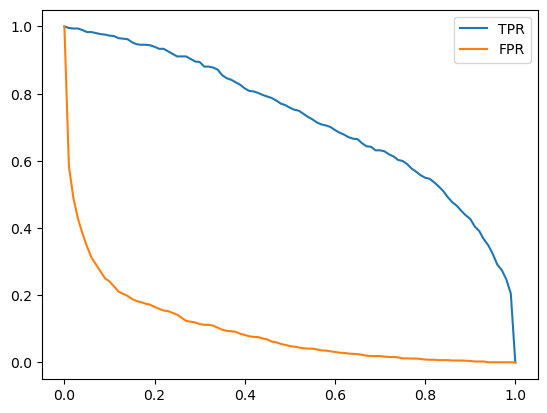

In [131]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [132]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))

In [133]:
((y_rand >= 0.5) == y_test).mean()

0.4867813680234998

In [134]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)\
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [135]:
df_random = tpr_fpr_dataframe(y_test, y_rand)

In [136]:
df_random

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,662,1721,0,0,1.000000,1.000000
1,0.01,654,1707,8,14,0.987915,0.991865
2,0.02,643,1685,19,36,0.971299,0.979082
3,0.03,635,1666,27,55,0.959215,0.968042
4,0.04,631,1645,31,76,0.953172,0.955840
...,...,...,...,...,...,...,...
96,0.96,35,56,627,1665,0.052870,0.032539
97,0.97,29,42,633,1679,0.043807,0.024404
98,0.98,19,27,643,1694,0.028701,0.015689
99,0.99,6,10,656,1711,0.009063,0.005811


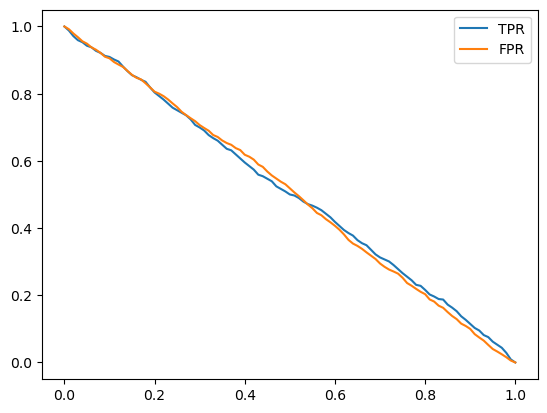

In [137]:
plt.plot(df_random.threshold, df_random['tpr'], label='TPR')
plt.plot(df_random.threshold, df_random['fpr'], label='FPR')
plt.legend()

### Ideal model

In [138]:
num_neg = (y_test == 0).sum()
num_pos = (y_test == 1).sum()
num_neg, num_pos

(1721, 662)

In [139]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

In [140]:
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [141]:
y_ideal_pred = np.linspace(0, 1, len(y_test))

In [142]:
1-y_test.mean()

0.7221989089383131

In [143]:
((y_ideal_pred >= 0.722) == y_ideal).mean()

0.9995803608896349

In [144]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

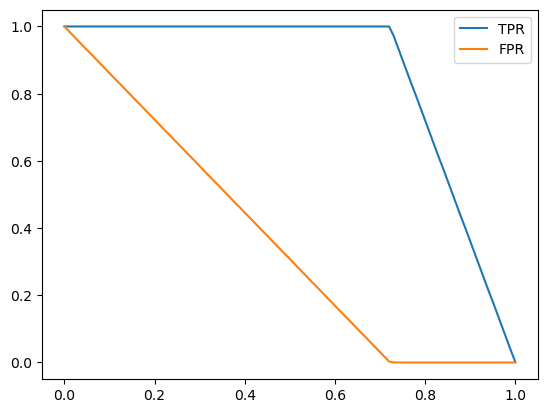

In [145]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

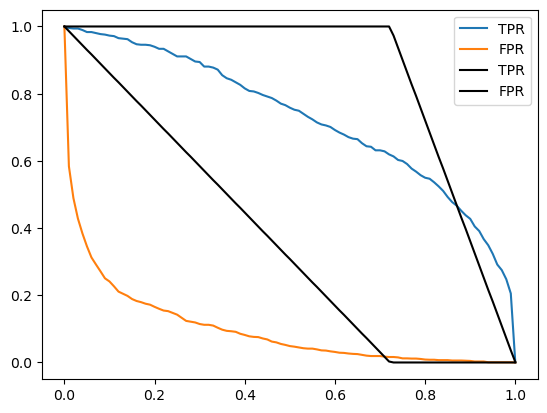

In [146]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_random.threshold, df_random['tpr'], label='TPR')
# plt.plot(df_random.threshold, df_random['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')
plt.legend()

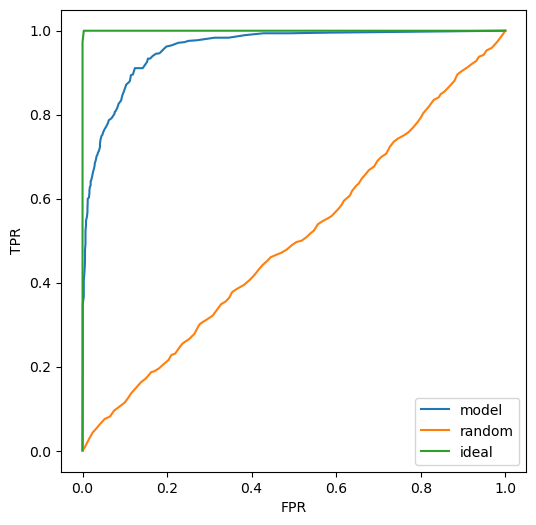

In [147]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_random.fpr, df_random.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

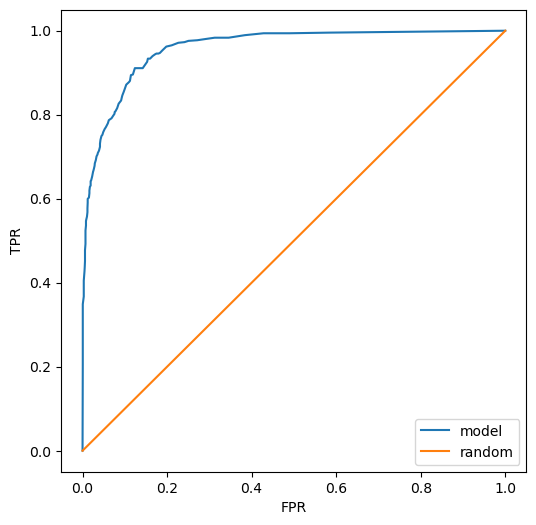

In [148]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [149]:
from sklearn.metrics import roc_curve

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [151]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 5.81057525e-04,
       5.81057525e-04, 5.81057525e-04, 5.81057525e-04, 1.74317257e-03,
       1.74317257e-03, 2.32423010e-03, 2.90528762e-03, 2.90528762e-03,
       2.90528762e-03, 2.90528762e-03, 2.90528762e-03, 2.90528762e-03,
      

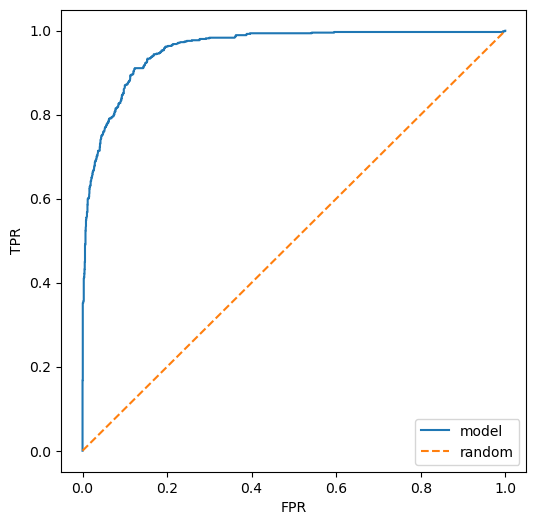

In [152]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### ROC AUC

In [153]:
from sklearn.metrics import auc

In [154]:
auc(fpr, tpr)

0.9578680630772174

In [155]:
auc(df_scores.fpr, df_scores.tpr)

0.9579510086000025

In [156]:
# shortcut

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9578680630772174

In [157]:
## AUC is the probablity that a randomly selected positive example 
# has a higher score than randomly selected negative example.

In [158]:
neg = y_pred[y_test == 0]
pos = y_pred[y_test == 1]

In [159]:
import random

In [160]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [161]:
pos[pos_ind] > neg[neg_ind]

True

In [162]:
## AUC Interpretation
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
    
success / n

0.95678

### Cross-Validation

In [180]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [181]:
dv, model = train(df_train, y_train, C=0.001)

In [165]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X=dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [166]:
y_pred = predict(df_val, dv, model)

In [167]:
from sklearn.model_selection import KFold

In [168]:
Kfold = KFold(n_splits=10, shuffle=True, random_state=1)



In [169]:
Kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x7fbc1c620c10>

In [171]:
from tqdm.auto import tqdm

In [188]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10 ]):
    scores = []

    for train_idx, test_idx in Kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[test_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.936 +- 0.004
C=0.01 0.953 +- 0.003


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=0.1 0.973 +- 0.004


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=0.5 0.979 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=1 0.980 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=5 0.980 +- 0.006


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=10 0.979 +- 0.006


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
dv, model = train(df_full_train, df_full_train.above_average.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9792908289461444

In [177]:
np.mean(scores), np.std(scores)

(0.9569121045180049, 0.007142951309677015)